In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/gdrive/My Drive/YAZ20411/weatherHistory.csv",sep=',')

In [ ]:
df

,Formatted_Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted_Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip_Type           95936 non-null  object 
 3   Temperature           96453 non-null  float64
 4   Apparent_Temperature  96453 non-null  float64
 5   Humidity              96453 non-null  float64
 6   Wind_Speed            96453 non-null  float64
 7   Wind_Bearing          96453 non-null  float64
 8   Visibility            96453 non-null  float64
 9   Loud_Cover            96453 non-null  float64
 10  Pressure              96453 non-null  float64
 11  Daily_Summary         96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


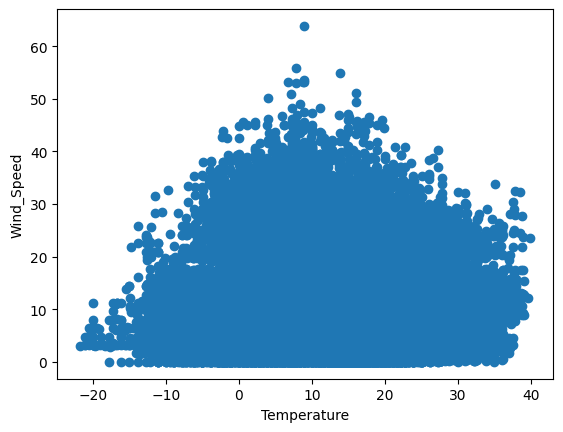

In [ ]:
plt.scatter(df.Temperature, df.Wind_Speed)
plt.xlabel("Temperature")
plt.ylabel("Wind_Speed")
plt.show()

# **Basic/Simple Linear Regression**

In [ ]:
x = df['Temperature'].values.reshape(-1, 1)
y = df['Wind_Speed'].values.reshape(-1, 1)

In [ ]:
print("x_shape: ", x.shape)
print("y_shape: ", y.shape)

x_shape:  (96453, 1)
y_shape:  (96453, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(96453, 1)
(96453, 1)
(77162, 1)
(77162, 1)
(19291, 1)
(19291, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

basic_regression = LinearRegression()

In [ ]:
basic_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = basic_regression.predict(x_test)

In [ ]:
print("COEFF: ", basic_regression.coef_)
print("Intercept (y eksenini kestiği nokta): ", basic_regression.intercept_)

COEFF:  [[0.00602396]]
Intercept (y eksenini kestiği nokta):  [10.74477111]


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred)*100)

MSE:  47.09069156871367
MAPE:  6.08157313445217e+16


# **Multiple Linear Regression**

In [ ]:
x = df[['Humidity', 'Temperature', 'Pressure','Wind_Bearing']]
y = df['Wind_Speed']

In [ ]:
print("x_shape: ", x.shape)
print("y_shape: ", y.shape)

x_shape:  (96453, 4)
y_shape:  (96453,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
multiple_regression = LinearRegression()

In [ ]:
multiple_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = multiple_regression.predict(x_test)

In [ ]:
print("COEFF: ", multiple_regression.coef_)
print("Intercept (y eksenini kestiği nokta): ", multiple_regression.intercept_)

COEFF:  [-1.30155306e+01 -1.65039005e-01 -2.82525934e-03  7.01513253e-03]
Intercept (y eksenini kestiği nokta):  23.86777952727676


In [ ]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred)*100)

MSE:  42.42470655913868
MAPE:  4.5731859601681016e+16
